In [1]:
%load_ext autoreload
%autoreload 2
%aimport base
%aimport fluidsim.base.output.increments

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%matplotlib inline
from paths import load_df
df_w = load_df()
df = df_w[df_w["$n$"] == 3840]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W3,3840,10,6.000402e-15,0.0,1.097854,115.339463,0.113343,inf,inf,1.0,3.599781,5.222821,49.85746,noise_c10nh3840Buinf
W7,3840,20,6.006974e-15,0.0,1.076911,115.339463,0.056309,inf,inf,1.0,4.493848,6.917684,119.89740,noise_c20nh3840Buinf
W11,3840,40,6.000402e-15,0.0,1.064035,115.339463,0.028042,inf,inf,1.0,6.066111,8.722656,49.82943,noise_c40nh3840Buinf
W14,3840,100,6.006974e-15,0.0,1.062093,115.339463,0.011210,inf,inf,1.0,9.413569,13.916670,119.89100,noise_c100nh3840Buinf
W18,3840,400,6.006974e-15,0.0,1.123243,115.339463,0.002855,inf,inf,1.0,19.165083,25.506900,119.40050,noise_c400nh3840Buinf


In [5]:
import fluidsim as fls
import numpy as np
from base import _k_f, set_figsize, _rxs_str_func, matplotlib_rc, _eps, _k_f
from paths import paths_sim, exit_if_figure_exists
from fractions import Fraction
import gc


def froude(sim, t_start):
    eps = _eps(sim, t_start)
    c = sim.params.c2 ** 0.5
    L_f = np.pi / _k_f(sim.params)
    F_f = (eps * L_f) ** (1. / 3) / c
    return F_f


def fig_struct(path, fig, axes, order=[2, 4], tmin=0, tmax=1000, delta_t=0.5, label="", run_nb=0):
    sim = fls.load_sim_for_plot(path, merge_missing_params=True)

    key_var = [
        'ux',
        'uy'
    ]
    rxs, So_var_dict, deltax = _rxs_str_func(
        sim, order, tmin, tmax, delta_t, key_var, cache=False)

    ones = np.ones(rxs.shape)

    L_f = np.pi / _k_f(sim.params)
    F_f = froude(sim, tmin)
    eps = _eps(sim, tmin)
    # alpha = 1 
    alpha = Fraction(4, 9)

    color_list = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    for i, (o, ax_row) in enumerate(zip(order, axes)):
        exp1 = Fraction(o, 3) - 1
        exp2 = Fraction(o, 3)
        exp0_str, exp1_str, exp2_str = ("{%s}" % e for e in (alpha, exp1, exp2))
        for j, (key, ax) in enumerate(zip(key_var, ax_row)):
            color1 = color_list[run_nb]
            color2 = color1 + ":"
            ## Old scaling
            # norm = 1 ; exp1 = None
            ## New scaling
            norm = (L_f * F_f**alpha)**exp1 * eps**exp2 ; 
            ## Alternate scaling
            # norm = (L_f * F_f**alpha)**(-1/3) * eps**(o/3) ; exp1 = "{-1/3}"

            So = So_var_dict['{0}_{1:.0f}'.format(key, o)] / norm / rxs
            # So = So_var_dict['{0}_{1:.0f}'.format(key, o)] / norm / rxs**(o-1)  # r^(p-1)
            if o % 2 == 0:
                ax.loglog(rxs, So, color1, linewidth=2, label=label)
            else:
                ax.loglog(rxs, So, color1, linewidth=2, label=label)
                ax.loglog(rxs, -So, color2
                          , linewidth=2, label=label)
                # ax.semilogx(rxs, So, color1, linewidth=2, label=label)
            ax.set_xlabel(f'$r_x$')

            if norm == 1:
                ax.set_ylabel(f'$<\delta {key}>^{o} / r_x$')
            else:
                ax.set_ylabel(f'$<\delta {key}>^{o} / (L_f F_f^{exp0_str})^{exp1_str} \epsilon^{exp2_str} r_x)$')

# 5th and 6th order structure functions

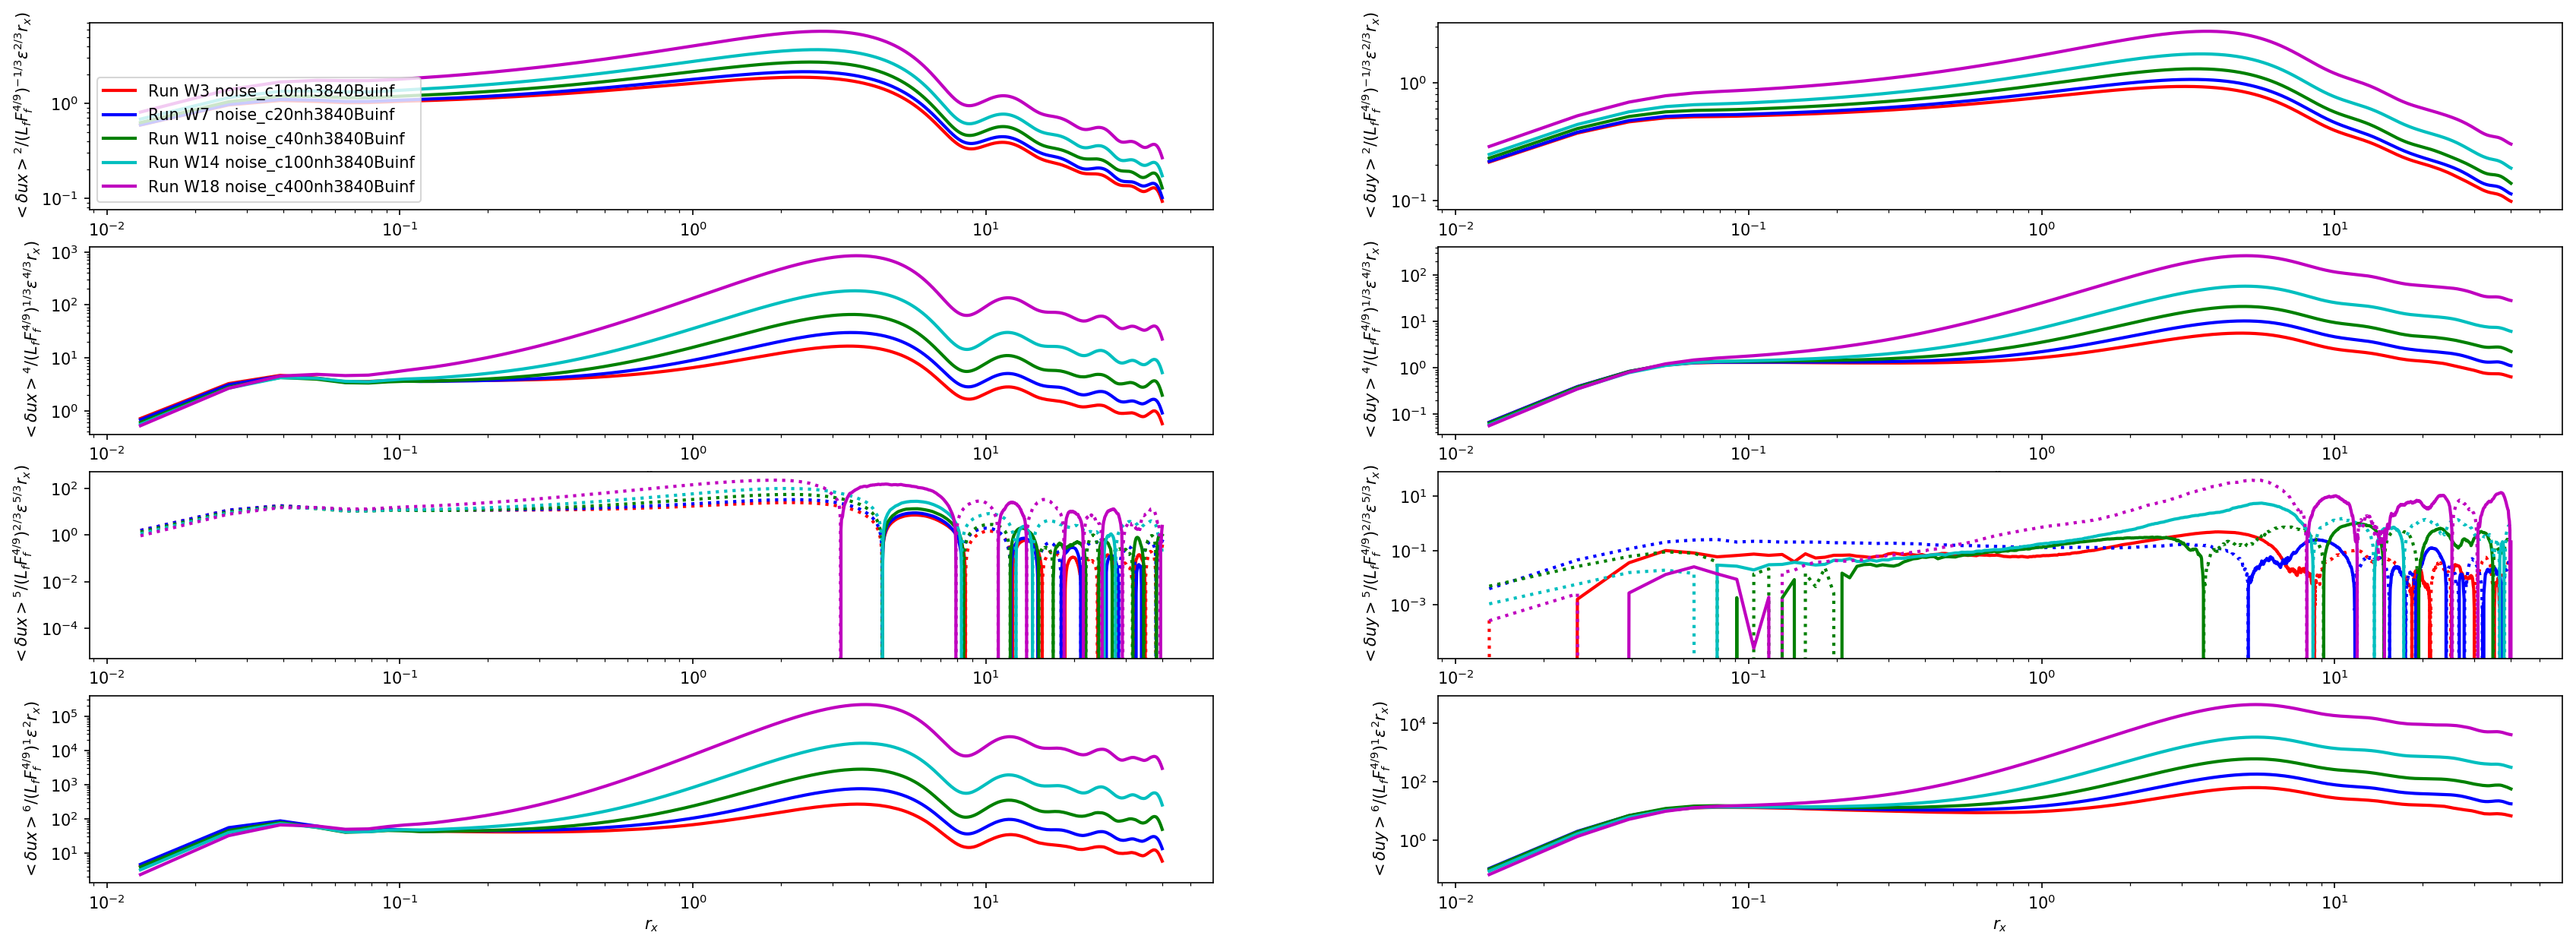

In [6]:
%%capture --no-display
import matplotlib.pyplot as plt

order = (2,4,5,6)
nb_ord = len(order)

fig, axes = plt.subplots(nb_ord, 2, dpi=150, figsize=(7 * nb_ord,10))
for i in range(len(df)):
    row = df.iloc[i]
    short_name = row["short name"]
    path = paths_sim[short_name]
    tmin = row[r"$t_{stat}$"]
    fig_struct(path, fig, axes, order=order,tmin=tmin,
               label=f"Run {row.name} {short_name}", run_nb=i%6)

axes[0,0].legend()

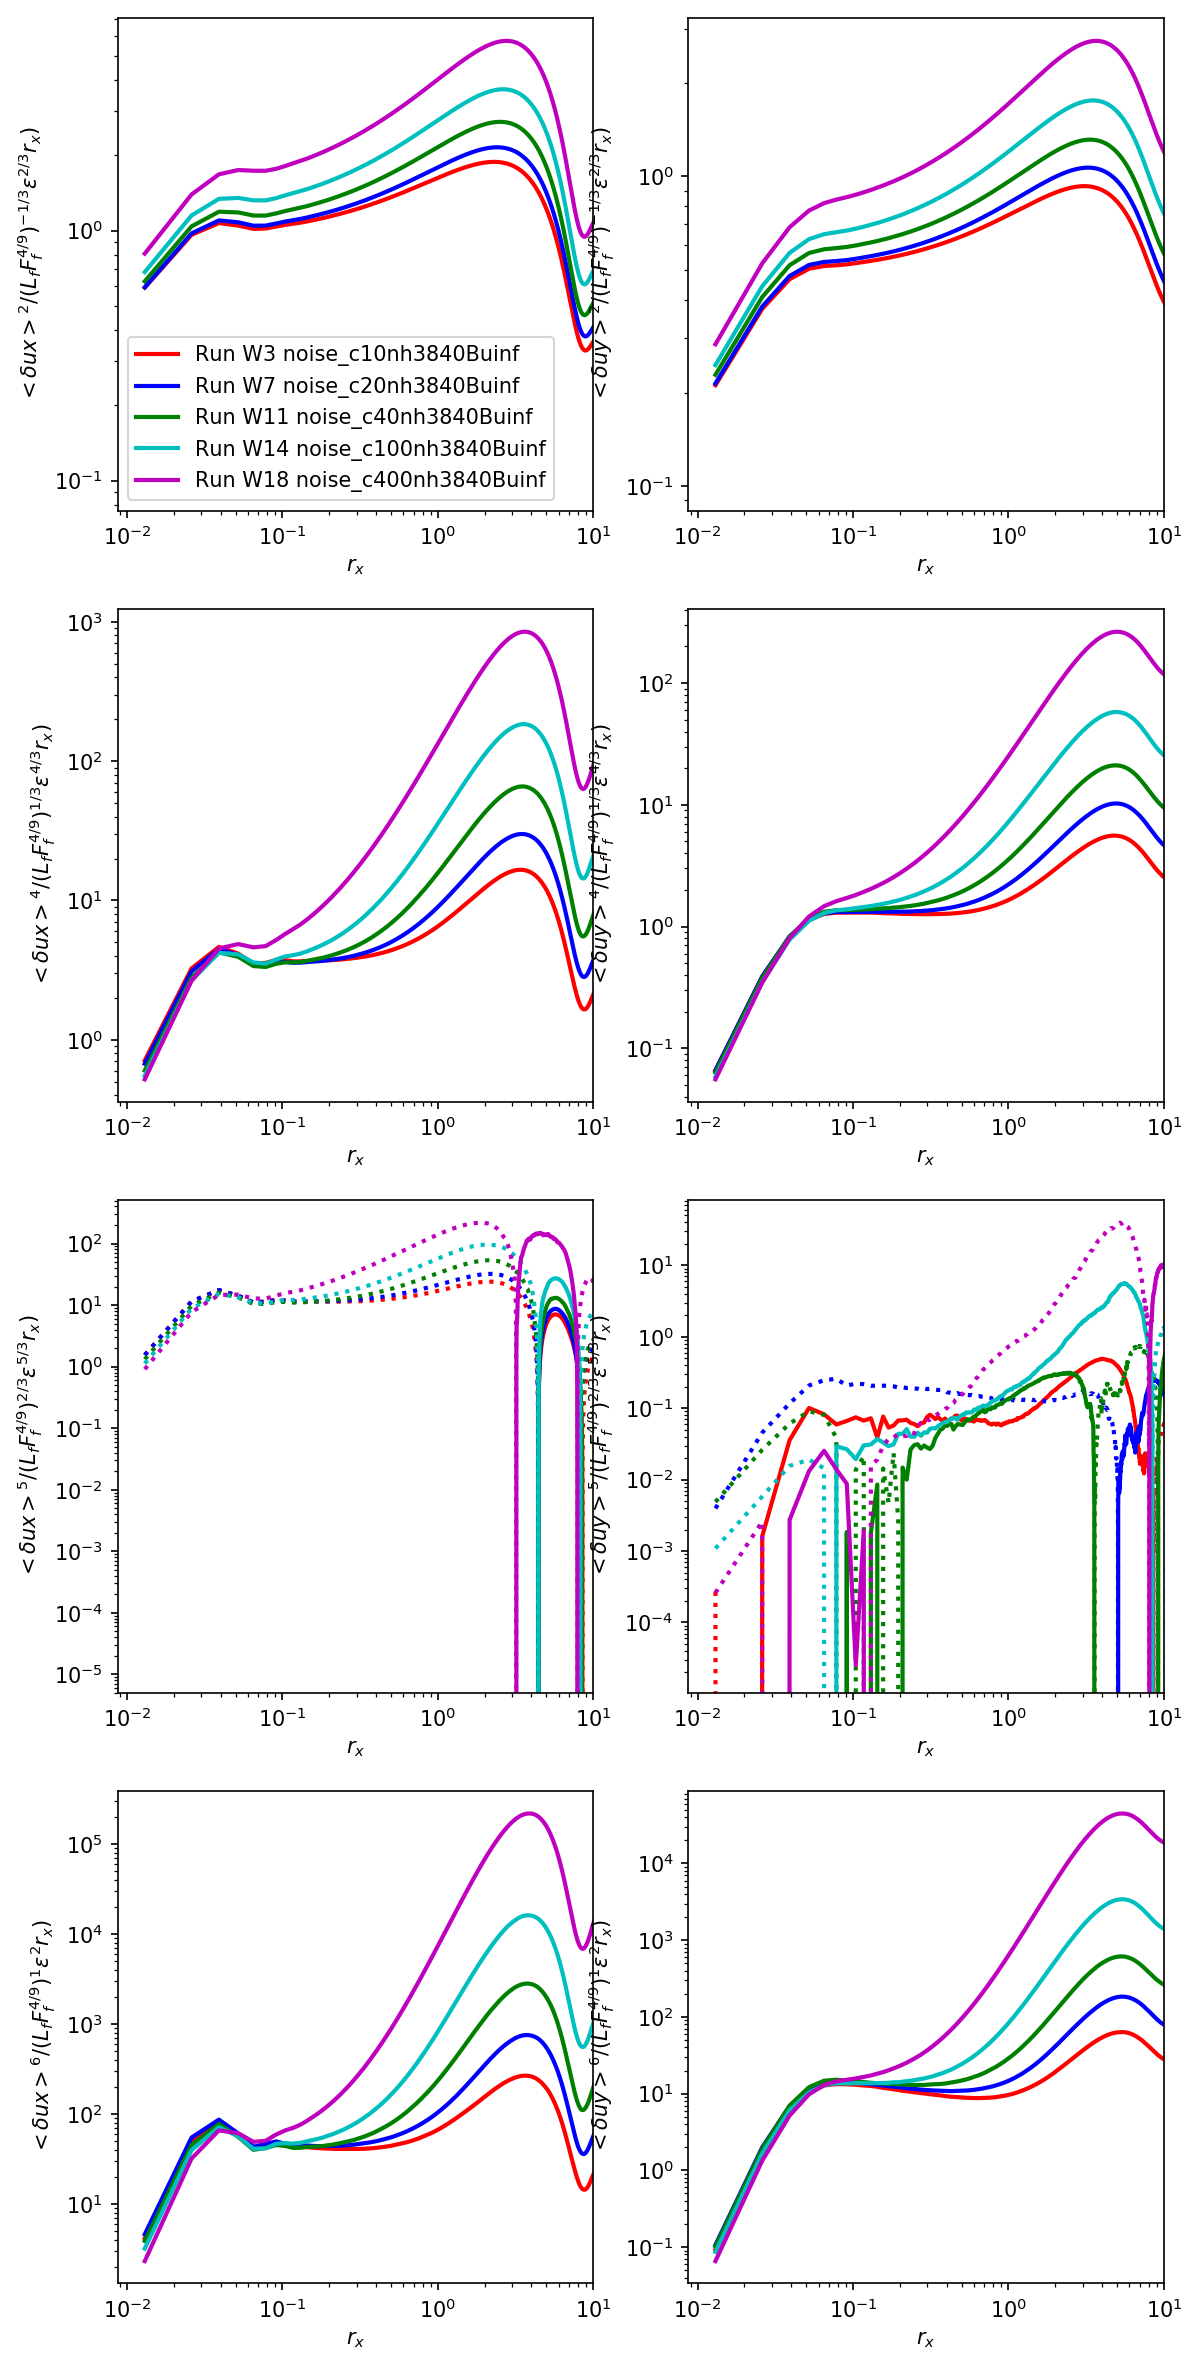

In [11]:
fig.set_size_inches(9,20)
[ax.set_xlim(None, 10) for ax in axes.ravel()]
fig

In [7]:
from IPython.display import Audio
sound_file = '/scratch/avmo/Downloads/notify.ogg'
Audio(filename=sound_file, autoplay=True)

# 2nd and 4th order structure functions

In [ ]:
%%capture --no-display
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=150, figsize=(14,10))
for i in range(len(df)):
    row = df.iloc[i]
    short_name = row["short name"]
    path = paths_sim[short_name]
    tmin = row[r"$t_{stat}$"]
    fig_struct(path, fig, axes, tmin=tmin, label=f"Run {row.name} {short_name}", run_nb=i%6)

axes[0,0].legend()

# Performance

In [10]:
test_path = paths_sim[df.iloc[0]["short name"]]
test_path

'/media/avmo/lacie/13KTH/noise/SW1Lwaves_NOISE2_c=10_L=50.x50._1920x1920_2017-01-06_17-32-32'

In [11]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [12]:
%%capture
import fluidsim as fls
from base import _rxs_str_func

sim = fls.load_sim_for_plot(test_path, merge_missing_params=True)

In [16]:
%%prun
_rxs_str_func(sim, [2], 0, 100, 0.5, ["ux"], cache=False)

plot(tmin=0, tmax=100, delta_t=0.50)
plot structure functions
tmin =        0 ; tmax =  49.6035 ; delta_t = 0.501045
imin =        0 ; imax =       99 ; delta_i =        1
 

         724205 function calls in 4.035 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.205    1.205    3.979    3.979 increments.py:342(load_pdf_from_file)
    96960    1.107    0.000    1.107    0.000 increments.py:120(compute_values_inc)
    96000    0.703    0.000    0.703    0.000 {built-in method numpy.core.multiarray.interp}
      504    0.306    0.001    0.417    0.001 dataset.py:399(__getitem__)
    96000    0.183    0.000    1.145    0.000 function_base.py:1179(interp)
    96000    0.101    0.000    0.133    0.000 type_check.py:250(iscomplexobj)
    96003    0.082    0.000    0.082    0.000 {built-in method numpy.core.multiarray.array}
      506    0.058    0.000    0.104    0.000 group.py:168(__getitem__)
        1    0.053    0.053    0.053    0.053 {built-in method fluidsim.base.output.util_pythran.strfunc_from_pdf}
    96000    0.045    0.000    0.127    0.000 numeric.py:433(asarray)
      504  

In [ ]:
%%prun
sim.output.increments.load_pdf_from_file(0, 100, "ux")